In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df_aeronefs = pd.read_csv("/Users/um/Desktop/Wild Code School/2_Top_gun/Datasets/df_aeronef/df_aeronef_clean.csv")
df_composants = pd.read_csv("/Users/um/Desktop/Wild Code School/2_Top_gun/Datasets/df_composants/df_composants_clean.csv")
df_degradations = pd.read_csv("/Users/um/Desktop/Wild Code School/2_Top_gun/Data_clean/degradations_full_cleaned.csv")
df_logs_vols = pd.read_csv("/Users/um/Desktop/Wild Code School/2_Top_gun/Data_clean/logs_vols_full_cleaned.csv")

In [38]:
display(df_aeronefs.head(1))
display(df_composants.head(1))
display(df_degradations.head(1))
display(df_logs_vols.head(1))

,ref_aero,type_model,debut_service,last_maint,en_maintenance,end_maint
0,E170_6353,E170,2000-03-17,2024-03-27,0,1970-01-01


,ref_compo,categorie,aero,desc,lifespan,taux_usure_actuel,cout
0,REAE170-E170_6353-0,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0


,ref_deg,linked_aero,compo_concerned,usure_nouvelle,measure_day,need_replacement
0,D003661,E170_6353,REAE170-E170_6353-0,54.0,2024-06-06,0


,ref_vol,aero_linked,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,V09972247,B757_0375,2024-06-06,3.5,0,6.4,911.2,0.009


In [39]:
# renomer la colonne clé pour merger les tables
df_aeronefs.rename(columns={"ref_aero": "id_aero"}, inplace=True)
df_composants.rename(columns={"aero": "id_aero"}, inplace=True)
df_degradations.rename(columns={"linked_aero": "id_aero"}, inplace=True)
df_logs_vols.rename(columns={"aero_linked": "id_aero"}, inplace=True)

In [40]:
df = pd.merge(df_composants, df_aeronefs, on='id_aero')
df = pd.merge(df, df_degradations, on='id_aero')
df = pd.merge(df, df_logs_vols, on='id_aero')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882900 entries, 0 to 882899
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ref_compo           882900 non-null  object 
 1   categorie           882900 non-null  int64  
 2   id_aero             882900 non-null  object 
 3   desc                882900 non-null  object 
 4   lifespan            882900 non-null  float64
 5   taux_usure_actuel   882900 non-null  float64
 6   cout                882900 non-null  float64
 7   type_model          882900 non-null  object 
 8   debut_service       882900 non-null  object 
 9   last_maint          882900 non-null  object 
 10  en_maintenance      882900 non-null  int64  
 11  end_maint           882900 non-null  object 
 12  ref_deg             882900 non-null  object 
 13  compo_concerned     882900 non-null  object 
 14  usure_nouvelle      882900 non-null  float64
 15  measure_day         832275 non-nul

In [42]:
df.drop(columns = ['ref_compo', 'ref_deg', 'ref_vol', 'compo_concerned'], inplace=True)

In [43]:
df.head()

,categorie,id_aero,desc,lifespan,taux_usure_actuel,cout,type_model,debut_service,last_maint,en_maintenance,end_maint,usure_nouvelle,measure_day,need_replacement,jour_vol,time_en_air,etat_voyant,temp en °C,pressure en hPa,vibrations en m/s²
0,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0,E170,2000-03-17,2024-03-27,0,1970-01-01,54.0,2024-06-06,0,2024-06-06,1.8,0,2.9,953.5,0.942
1,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0,E170,2000-03-17,2024-03-27,0,1970-01-01,51.0,2024-06-06,0,2024-06-06,1.8,0,2.9,953.5,0.942
2,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0,E170,2000-03-17,2024-03-27,0,1970-01-01,18.0,2024-06-06,0,2024-06-06,1.8,0,2.9,953.5,0.942
3,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0,E170,2000-03-17,2024-03-27,0,1970-01-01,8.0,2024-06-06,0,2024-06-06,1.8,0,2.9,953.5,0.942
4,2,E170_6353,Réacteur gauche,13045.0,53.308375,15552.0,E170,2000-03-17,2024-03-27,0,1970-01-01,43.0,2024-06-06,0,2024-06-06,1.8,0,2.9,953.5,0.942


<Figure size 1500x1000 with 0 Axes>

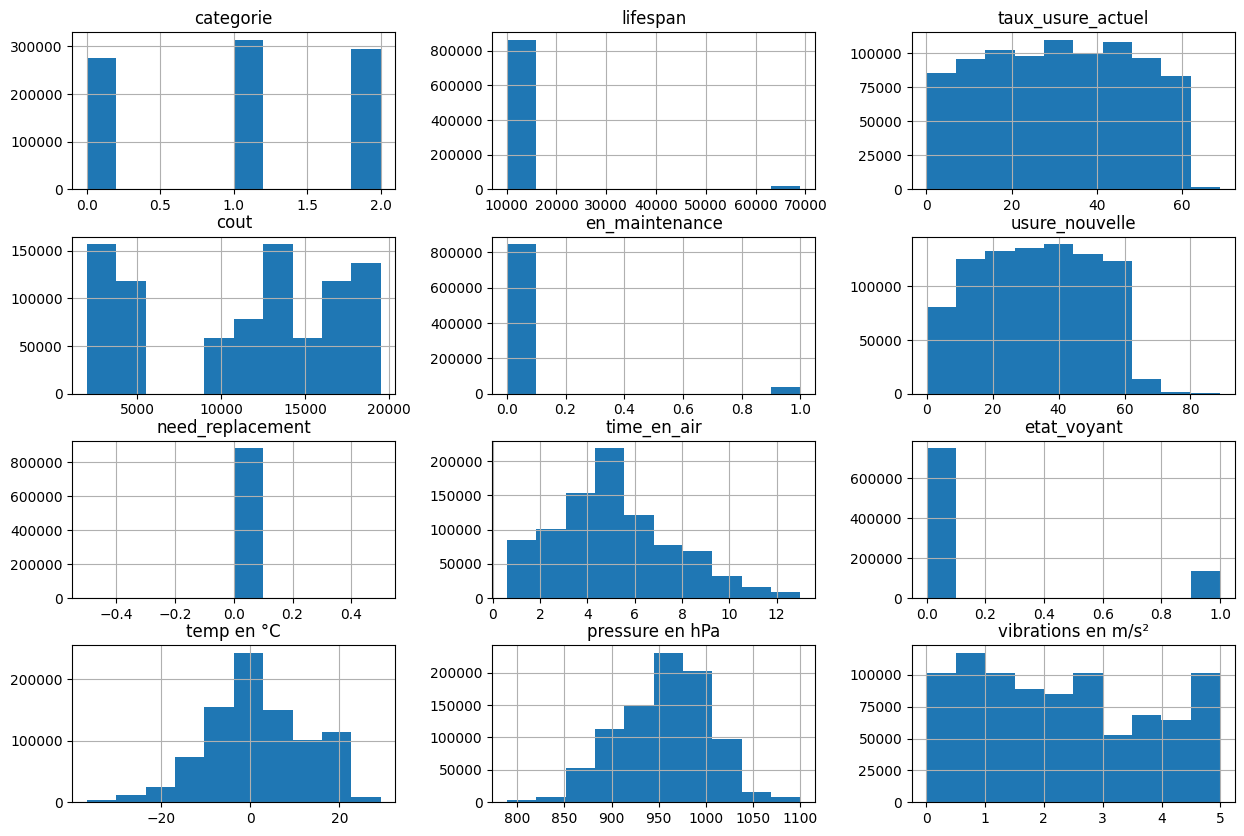

In [56]:
plt.figure(figsize=(15, 10))
numerical_columns = df.select_dtypes(include=["float", "int"]).hist(figsize=(15, 10))

plt.show()